In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:3], df.iloc[:,0], test_size=0.2, random_state=10)

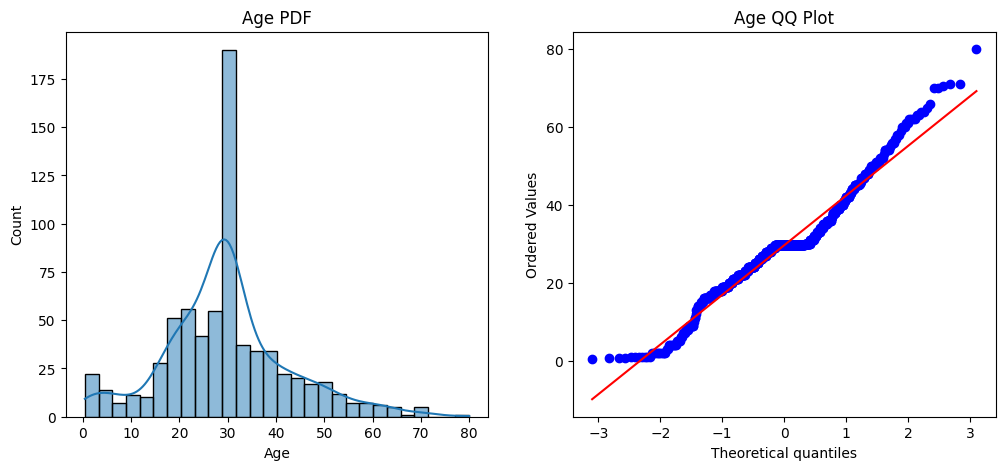

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

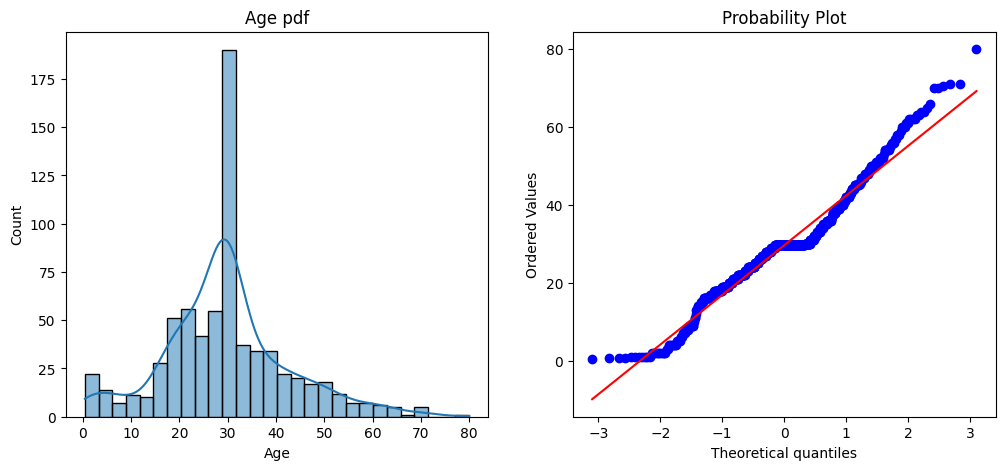

In [9]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Age pdf')
ax2.set_title('Age qq plot')


sns.histplot(x_train['Age'], ax=ax1, kde=True)
stats.probplot(x_train['Age'], dist="norm", plot=plt)

plt.show()

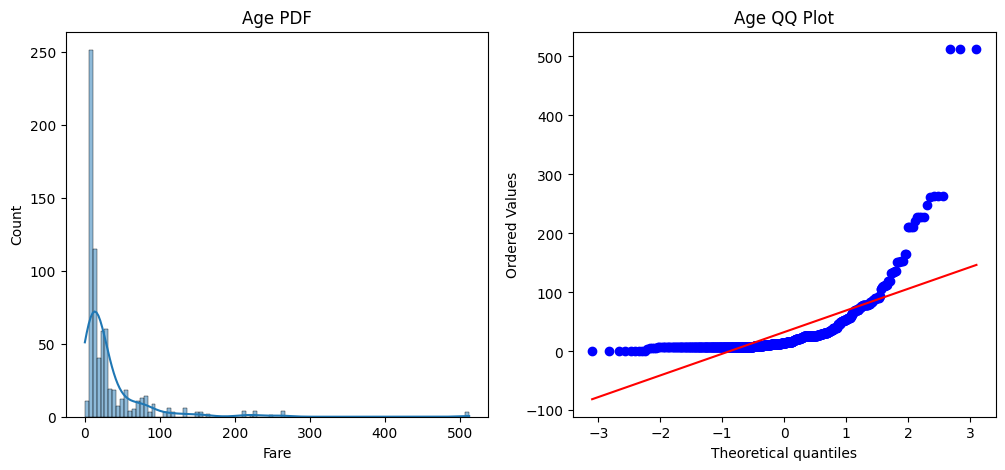

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [11]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

In [14]:
accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2)

(0.7430167597765364, 0.6201117318435754)

In [15]:
trf = FunctionTransformer(func=np.log1p)

In [16]:
x_train_trans = trf.fit_transform(x_train)
x_test_trans = trf.transform(x_test)

In [17]:
clf1.fit(x_train_trans,y_train)
clf2.fit(x_train_trans,y_train)

DecisionTreeClassifier()

In [18]:
y_pred1_trans = clf1.predict(x_test_trans)
y_pred2_trans = clf2.predict(x_test_trans)

In [19]:
accuracy_score(y_test, y_pred1_trans), accuracy_score(y_test, y_pred2_trans)

(0.7877094972067039, 0.6145251396648045)

In [20]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [21]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6566042446941325


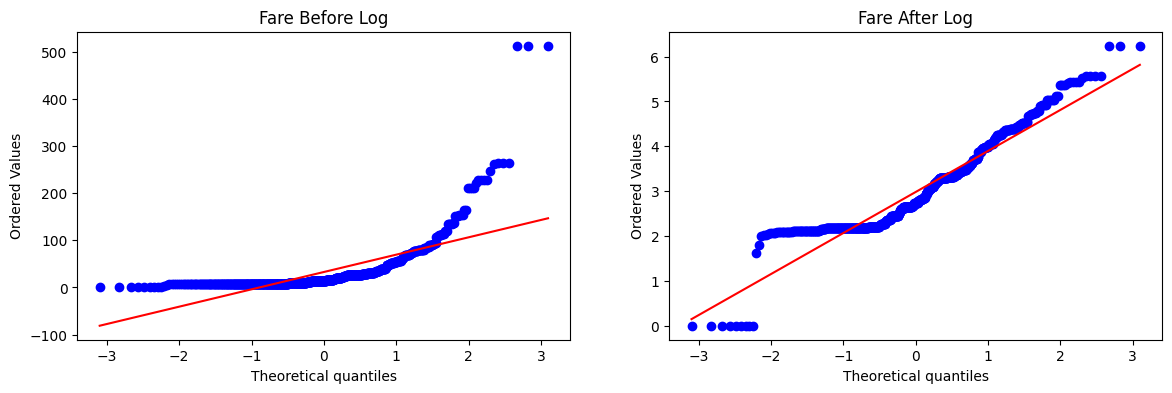

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_trans['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

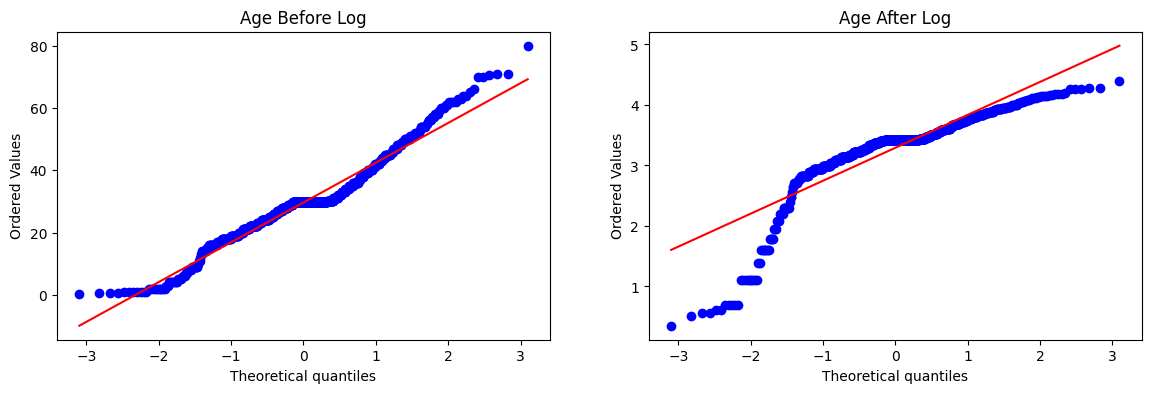

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_trans['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

The above graph shows that since the age data was not right scewed, therefore applying log trans. actually messed it up

In [24]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(x_train)
X_test_transformed2 = trf2.transform(x_test)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

Accuracy LR 0.770949720670391
Accuracy DT 0.6089385474860335
LR 0.6712609238451936
DT 0.6599625468164794


In [25]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6442446941323345


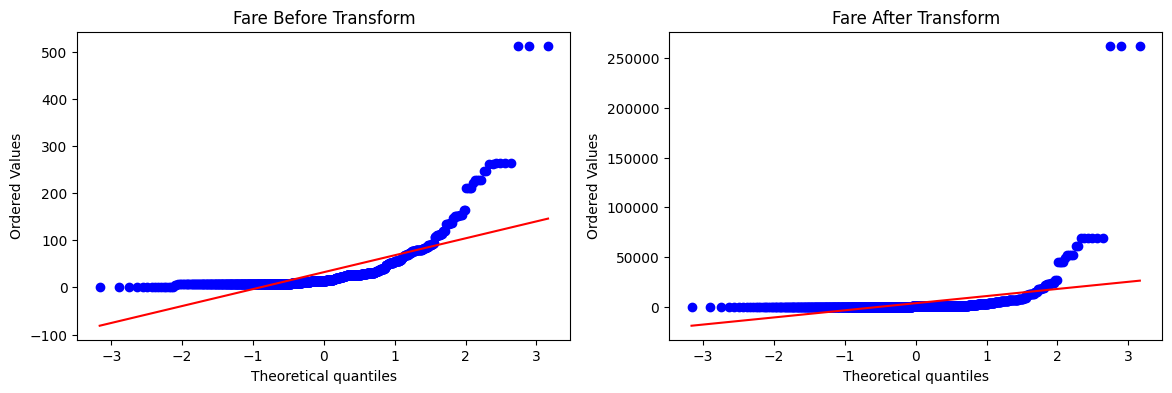

In [26]:
apply_transform(lambda x : x**2)

Accuracy 0.6195131086142323


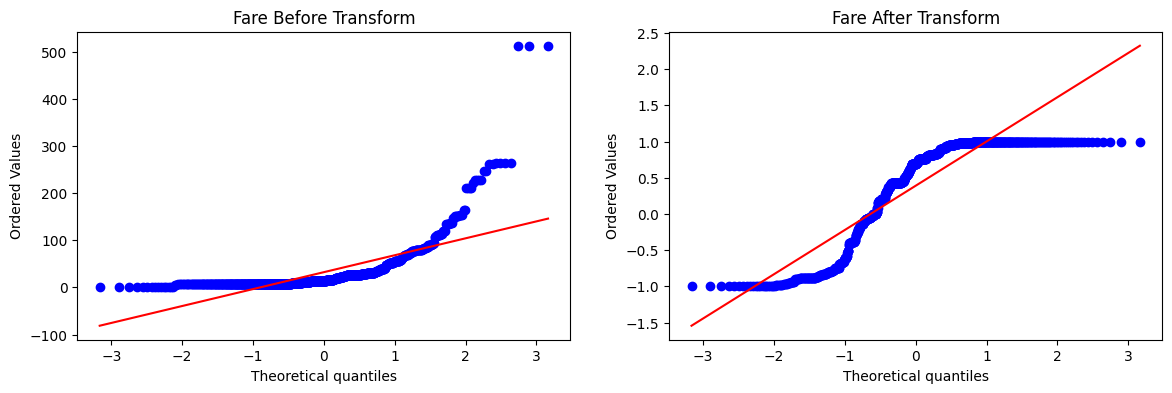

In [27]:
apply_transform(np.sin)

Accuracy 0.6712609238451936


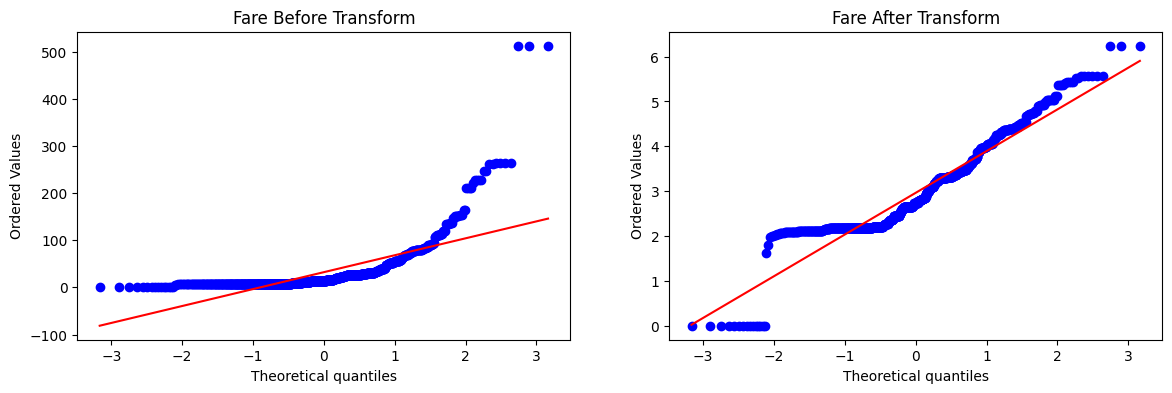

In [28]:
apply_transform(np.log1p)